In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Pregnancy as target
train_x = pd.read_csv('csv_files/x_train_binary_IVF.csv')
train_y = pd.read_csv('csv_files/y_train_binary_IVF.csv')
test_x = pd.read_csv('csv_files/x_test_binary_IVF.csv')
test_y = pd.read_csv('csv_files/y_test_binary_IVF.csv')

# Chance of Live Birth as target
train_x_IVF = pd.read_csv('csv_files/train_binary_x.csv')
train_y_IVF = pd.read_csv('csv_files/train_binary_y.csv')
test_x_IVF = pd.read_csv('csv_files/test_binary_x.csv')
test_y_IVF = pd.read_csv('csv_files/test_binary_y.csv')

In [12]:
print('Test_x shape: ', test_x.shape)
print('Train_x shape: ', train_x.shape)
print('Train_y shape: ', train_y.shape)

print('Test_x_IVF shape: ', test_x_IVF.shape)
print('Train_x_IVF shape: ', train_x_IVF.shape)
print('Train_y_IVF shape: ', train_y_IVF.shape)

Test_x shape:  (31226, 27)
Train_x shape:  (124904, 27)
Train_y shape:  (124904, 1)
Test_x_IVF shape:  (31226, 28)
Train_x_IVF shape:  (124904, 28)
Train_y_IVF shape:  (124904, 1)


In [13]:
test_x_IVF

,Patient Age at Treatment,Total Number of Previous IVF cycles,Total number of IVF pregnancies,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,Type of Infertility -Couple Secondary,Cause of Infertility - Tubal disease,...,Embryos Transfered,Elective Single Embryo Transfer,Egg Source,Fresh Cycle,Frozen Cycle,Eggs Mixed With Partner Sperm,Eggs Mixed With Donor sperm,Total Embryos Thawed,Sperm From Partner,Sperm From Donor
0,26.0,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,0.000000,0.000000,1,0
1,36.0,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,1,0
2,38.5,0,0,0,0,0,0,0,0,0,...,1.163756,1.163756,1.163756,1.163756,1.163756,1.163756,1.163756,1.163756,0,1
3,26.0,0,0,0,0,0,0,0,0,0,...,2.000000,0.000000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1,0
4,26.0,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31221,26.0,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,0.000000,1.000000,0.000000,9.000000,0.000000,0.000000,1,0
31222,36.0,0,0,0,0,0,0,0,0,0,...,1.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,1,0
31223,36.0,0,0,0,0,0,0,0,0,0,...,2.000000,0.000000,0.000000,1.000000,0.000000,7.000000,0.000000,0.000000,1,0
31224,26.0,0,0,0,0,0,0,0,0,0,...,1.000000,1.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1,0


In [14]:
train_y_IVF

,LiveBirth
0,1
1,0
2,1
3,0
4,0
...,...
124899,1
124900,0
124901,0
124902,0


In [15]:
print(train_y)

        Pregnant
0              0
1              0
2              0
3              0
4              0
...          ...
124899         0
124900         0
124901         0
124902         0
124903         0

[124904 rows x 1 columns]


In [16]:
print(train_y_IVF)

        LiveBirth
0               1
1               0
2               1
3               0
4               0
...           ...
124899          1
124900          0
124901          0
124902          0
124903          0

[124904 rows x 1 columns]


In [17]:
# Index for pregnancy model
index2name = list(train_x.columns)
print(index2name)

['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source', 'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm', 'Total Embryos Thawed', 'Sperm From Partner', 'Sperm From Donor']


In [18]:
# Index for IVF model
index_IVF_name = list(train_x_IVF.columns)
print(index_IVF_name)

['Patient Age at Treatment', 'Total Number of Previous IVF cycles', 'Total number of IVF pregnancies', 'Type of Infertility - Female Primary', 'Type of Infertility - Female Secondary', 'Type of Infertility - Male Primary', 'Type of Infertility - Male Secondary', 'Type of Infertility -Couple Primary', 'Type of Infertility -Couple Secondary', 'Cause  of Infertility - Tubal disease', 'Cause of Infertility - Ovulatory Disorder', 'Cause of Infertility - Male Factor', 'Cause of Infertility - Patient Unexplained', 'Cause of Infertility - Endometriosis', 'Cause of Infertility - Cervical factors', 'Cause of Infertility -  Partner Sperm Morphology', 'Stimulation used', 'Number of foetal sacs with fetal pulsation', 'Embryos Transfered', 'Elective Single Embryo Transfer', 'Egg Source', 'Fresh Cycle', 'Frozen Cycle', 'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm', 'Total Embryos Thawed', 'Sperm From Partner', 'Sperm From Donor']


In [45]:
X = train_x.values
y = train_y.astype(int).values.ravel()

per_clf = Perceptron(
    max_iter=1000, 
    tol=1e-3, 
    random_state=42)

per_clf.fit(X, y)

y_pred = per_clf.predict(test_x.values)

In [46]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
# Pregnancy model 
from sklearn.metrics import classification_report

print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     26270
           1       0.60      0.01      0.02      4956

    accuracy                           0.84     31226
   macro avg       0.72      0.51      0.47     31226
weighted avg       0.80      0.84      0.77     31226



In [48]:
print('Confusion Matrix1:')
print(confusion_matrix(test_y, y_pred))

Confusion Matrix1:
[[26231    39]
 [ 4898    58]]


In [35]:
# Live Birth model
X_IVF = train_x_IVF.values
y_IVF = train_y_IVF.astype(int).values.ravel()

per_clf_IVF = Perceptron(
    max_iter=1000, 
    tol=1e-3, 
    random_state=42)

per_clf_IVF.fit(X_IVF, y_IVF)

y_pred_IVF = per_clf_IVF.predict(test_x_IVF.values)

In [36]:
y_pred_IVF

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# IVF model
print(classification_report(test_y_IVF, y_pred_IVF))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27451
           1       0.77      1.00      0.87      3775

    accuracy                           0.96     31226
   macro avg       0.89      0.98      0.92     31226
weighted avg       0.97      0.96      0.97     31226



In [38]:
# Live birth model 
print('Confusion Matrix2:')
print(confusion_matrix(test_y_IVF, y_pred_IVF))
(tn, fp, fn, tp) = confusion_matrix(test_y_IVF, y_pred_IVF).ravel()
print(f'True negative: {tn}\nFalse Positive: {fp}\nFalse Negative: {fn}\nTrue Positive: {tp}')
# Results show 0 False Negatives = model tells the woman she will have a baby when she won't

Confusion Matrix2:
[[26326  1125]
 [    0  3775]]
True negative: 26326
False Positive: 1125
False Negative: 0
True Positive: 3775


In [58]:
# Using SMOTE to resample target data 
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_smt, train_y_smt = smt.fit_resample(train_x, train_y)

smt_IVF = SMOTE(random_state = 100, sampling_strategy = 1.0)
train_x_smt_IVF, train_y_smt_IVF = smt_IVF.fit_resample(train_x_IVF, train_y_IVF)

In [60]:
# SMOTE values on y train pregnancy model & y train IVF successful model 
print('SMOTE for live birth')
print(train_y_smt.value_counts())
print('\n')
print('SMOTE for pregnant')
print(train_y_smt_IVF.value_counts())

SMOTE for live birth
Pregnant
0           105080
1           105080
dtype: int64


SMOTE for pregnant
LiveBirth
0            109803
1            109803
dtype: int64


In [61]:
from sklearn.metrics import confusion_matrix

# Perceptron model w/SMOTE for pregnancy 
X1 = train_x_smt.values
y1 = train_y_smt.astype(int).values.ravel()
per_clf1 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf1.fit(X1, y1)
y_pred = per_clf1.predict(test_x.values)
print('Confusion Matrix1:')
print(confusion_matrix(test_y, y_pred))
print('Classification Report1:')
print(classification_report(test_y, y_pred))
print('\n')

# Perceptron model w/SMOTE for live birth from IVF
X2 = train_x_smt_IVF.values
y2 = train_y_smt_IVF.astype(int).values.ravel()
per_clf2 = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf2.fit(X2, y2)
y_pred_IVF = per_clf2.predict(test_x_IVF.values)
print('Confusion Matrix - Live Birth success:')
print(confusion_matrix(test_y_IVF, y_pred_IVF))
print('Classification Report: Live Birth success')
print(classification_report(test_y_IVF, y_pred_IVF))
print('\n')

Confusion Matrix1:
[[25225  1045]
 [ 3747  1209]]
Classification Report1:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     26270
           1       0.54      0.24      0.34      4956

    accuracy                           0.85     31226
   macro avg       0.70      0.60      0.62     31226
weighted avg       0.82      0.85      0.82     31226



Confusion Matrix1:
[[26321  1130]
 [    0  3775]]
Classification Report1:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     27451
           1       0.77      1.00      0.87      3775

    accuracy                           0.96     31226
   macro avg       0.88      0.98      0.92     31226
weighted avg       0.97      0.96      0.97     31226





Feature: 0 Patient Age at Treatment, Score: -0.004484202512371549
Feature: 1 Total Number of Previous IVF cycles, Score: 0.0012952036543585788
Feature: 2 Type of Infertility - Female Primary, Score: 0.00019318614389034482
Feature: 3 Type of Infertility - Female Secondary, Score: 7.613247049853555e-06
Feature: 4 Type of Infertility - Male Primary, Score: 0.0001275218880852469
Feature: 5 Type of Infertility - Male Secondary, Score: 3.2356299961910914e-05
Feature: 6 Type of Infertility -Couple Primary, Score: 0.00020365435858391568
Feature: 7 Type of Infertility -Couple Secondary, Score: 1.1419870574780332e-05
Feature: 8 Cause  of Infertility - Tubal disease, Score: -0.00016082984392846723
Feature: 9 Cause of Infertility - Ovulatory Disorder, Score: 2.1888085268351175e-05
Feature: 10 Cause of Infertility - Male Factor, Score: 0.00031499809668822376
Feature: 11 Cause of Infertility - Patient Unexplained, Score: -3.5211267605650407e-05
Feature: 12 Cause of Infertility - Endometriosis, Score

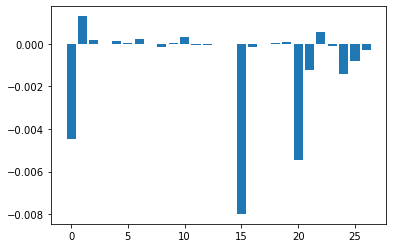

In [63]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# CHANCE OF SUCCESFUL PRGENANCY MODEL 

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results = permutation_importance(per_clf, X1, y1, scoring='neg_mean_squared_error')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i,v in enumerate(importance):
    # print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {i} {index2name[i]}, Score: {v}')

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0 Patient Age at Treatment, Score: -1.8214438585476001e-06
Feature: 1 Total Number of Previous IVF cycles, Score: 4.553609646366224e-06
Feature: 2 Total number of IVF pregnancies, Score: 0.4782009599009135
Feature: 3 Type of Infertility - Female Primary, Score: -4.553609646365531e-06
Feature: 4 Type of Infertility - Female Secondary, Score: -9.10721929273453e-06
Feature: 5 Type of Infertility - Male Primary, Score: -4.553609646365531e-06
Feature: 6 Type of Infertility - Male Secondary, Score: -9.10721929273453e-06
Feature: 7 Type of Infertility -Couple Primary, Score: -4.553609646365531e-06
Feature: 8 Type of Infertility -Couple Secondary, Score: -4.553609646365531e-06
Feature: 9 Cause  of Infertility - Tubal disease, Score: -9.107219292731061e-07
Feature: 10 Cause of Infertility - Ovulatory Disorder, Score: 6.37505350491313e-06
Feature: 11 Cause of Infertility - Male Factor, Score: 7.2857754341862365e-06
Feature: 12 Cause of Infertility - Patient Unexplained, Score: 9.1072192

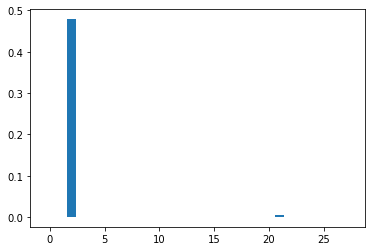

In [64]:
# Neural networks (including perceptron) do not have feature importance so I am looking at permutation importance
# CHANCE OF LIVE BIRTH MODEL 

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Perform permutation importance
results_IVF = permutation_importance(per_clf_IVF, X2, y2, scoring='neg_mean_squared_error')

# Get importance
importance_IVF = results_IVF.importances_mean

# Summarize feature importance
for i,v in enumerate(importance_IVF):
 #print('Feature: {}, Score: %.5f' % (i,v))
    print(f'Feature: {i} {index_IVF_name[i]}, Score: {v}')

# Plot feature importance
plt.bar([x for x in range(len(importance_IVF))], importance_IVF)
plt.show()